<a href="https://colab.research.google.com/github/Pavanmk1310/streamlit_download-functionality/blob/main/Grovers_oracle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install qiskit

In [16]:
pip install matplotlib

In [17]:
pip install qiskit-aer

In [18]:
pip install qiskit_ibm_runtime


In [19]:
pip install pylatexenc

In [20]:
import qiskit

import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

import random
from qiskit.quantum_info import Statevector
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT
from math import sqrt, pow, pi

In [21]:
pip install aer

In [22]:
qiskit.__version__

'1.1.1'

In [23]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

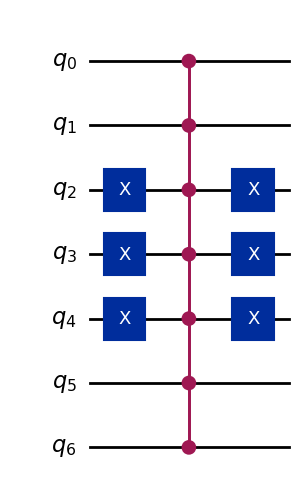

In [24]:
marked_states = ["1100011"] #binary form of 99 passed to the oracle
oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

In [25]:
import qiskit.quantum_info as qi

op = qi.Operator(oracle)
print(op)
# circuit.draw(output="mpl", style="iqp")

from qiskit.visualization import array_to_latex

array_to_latex(op, prefix='oracle=')

Operator([[ 1.00000000e+00-4.96130914e-15j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j, ...,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            1.00000000e+00-4.94743135e-15j,
            0.00000000e+00+0.00000000e+00j, ...,
           -5.46944702e-63+3.83167549e-47j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            1.00000000e+00-4.89885910e-15j, ...,
            0.00000000e+00+0.00000000e+00j,
           -5.47382213e-48-2.18952885e-47j,
            0.00000000e+00+0.00000000e+00j],
          ...,
          [ 0.00000000e+00+0.00000000e+00j,
            8.55284707e-50-6.84227766e-49j,
            0.00000000e+00+0.00000000e+00j, ...,
            1.00000000e+00-1.36696210e

<IPython.core.display.Latex object>

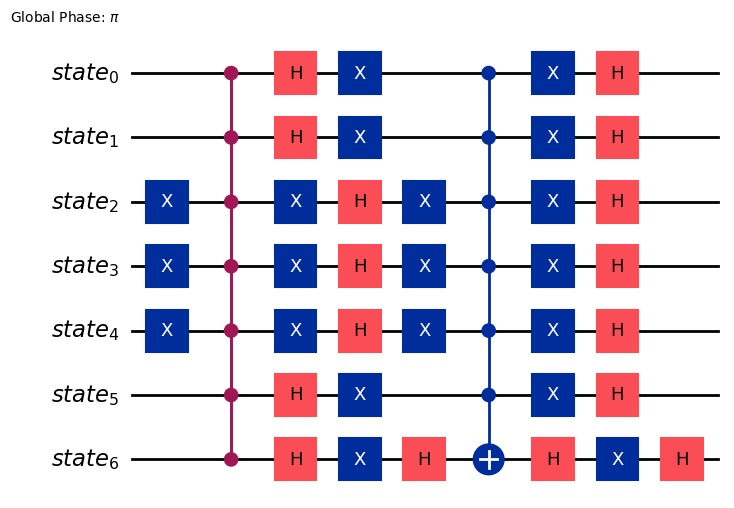

In [26]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [27]:
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)
optimal_num_iterations# calculating total number of iterations needed

8

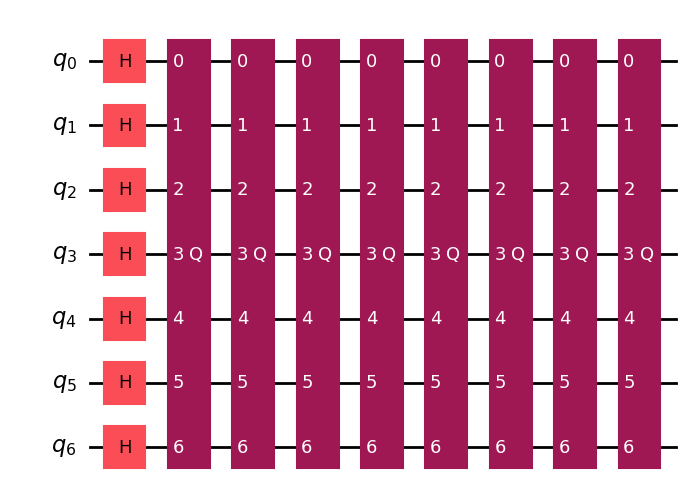

In [28]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
# qc.measure_all()
qc.draw(output="mpl", style="iqp")

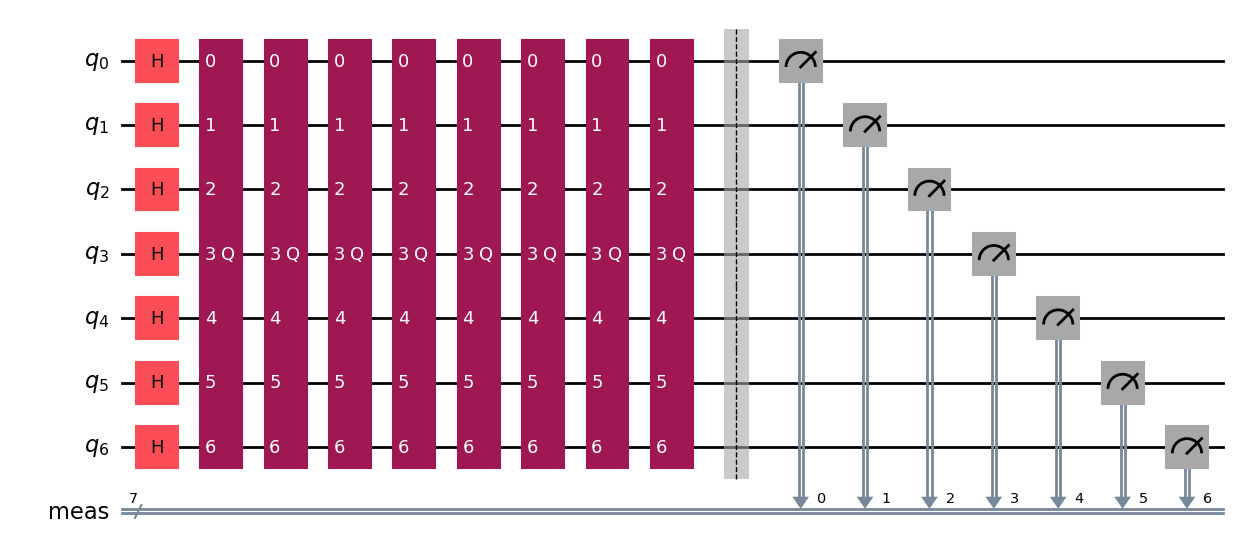

In [29]:
qc= QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

In [30]:
def analyze_quantum_circuit(circuit: QuantumCircuit):
    """
    Analyzes a quantum circuit and returns various metrics.

    Parameters:
    circuit (QuantumCircuit): The quantum circuit to analyze.

    Returns:
    dict: A dictionary containing various metrics about the circuit.
    """
    # Number of qubits
    num_qubits = circuit.num_qubits

    # Number of classical bits
    num_clbits = circuit.num_clbits

    # Depth of the circuit
    circuit_depth = circuit.depth()

    # Size of the circuit (number of operations)
    circuit_size = circuit.size()

    # Get circuit data
    instructions = circuit.data

    # Number of non-local gates
    num_nonlocal_gates = sum(1 for gate, qargs, _ in instructions if len(qargs) > 1)

    # Number of local gates
    num_local_gates = sum(1 for gate, qargs, _ in instructions if len(qargs) == 1)

    # Number of measurements
    num_measurements = sum(1 for gate, _, _ in instructions if gate.name == 'measure')

    # Number of single qubit gates
    num_single_qubit_gates = sum(1 for gate, qargs, _ in instructions if len(qargs) == 1)

    # Number of multi qubit gates
    num_multi_qubit_gates = sum(1 for gate, qargs, _ in instructions if len(qargs) > 1)

    # Get the width of the circuit (total number of qubits + classical bits)
    circuit_width = circuit.width()

    analysis = {
        "num_qubits": num_qubits,
        "num_clbits": num_clbits,
        "circuit_depth": circuit_depth,
        "circuit_size": circuit_size,
        "num_nonlocal_gates": num_nonlocal_gates,
        "num_local_gates": num_local_gates,
        "num_measurements": num_measurements,
        "num_single_qubit_gates": num_single_qubit_gates,
        "num_multi_qubit_gates": num_multi_qubit_gates,
        "circuit_width": circuit_width
    }

    return analysis


In [31]:
analyze_quantum_circuit(qc)

{'num_qubits': 7,
 'num_clbits': 7,
 'circuit_depth': 10,
 'circuit_size': 22,
 'num_nonlocal_gates': 9,
 'num_local_gates': 14,
 'num_measurements': 7,
 'num_single_qubit_gates': 14,
 'num_multi_qubit_gates': 9,
 'circuit_width': 14}

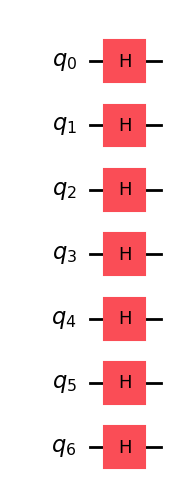

In [42]:
qc_2= QuantumCircuit(grover_op.num_qubits)
qc_2.h(range(grover_op.num_qubits))
qc_2.draw(output='mpl',style='iqp')

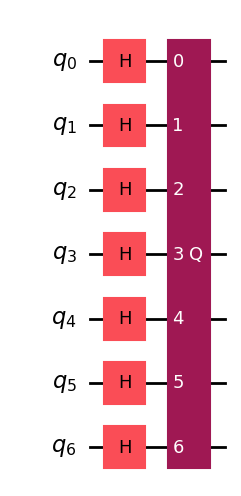

In [43]:
qc_2.compose(grover_op.power(1),inplace=True)
qc_2.draw(output='mpl',style='iqp')

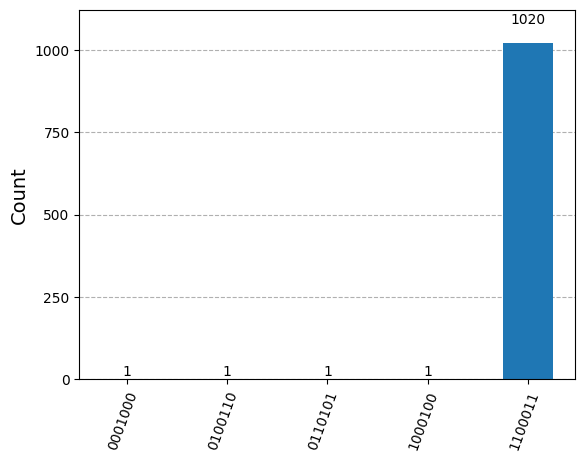

In [44]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

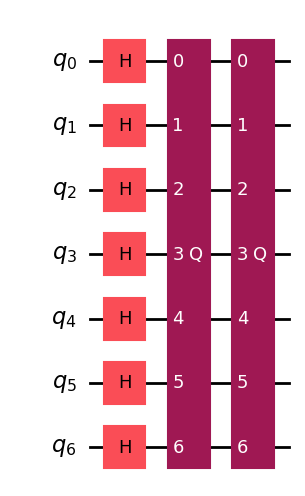

In [45]:
qc_2.compose(grover_op.power(1),inplace=True)#second iteration
qc_2.draw(output='mpl',style='iqp')

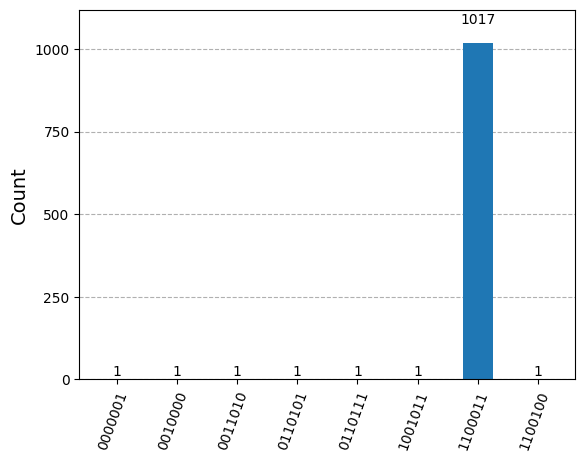

In [46]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

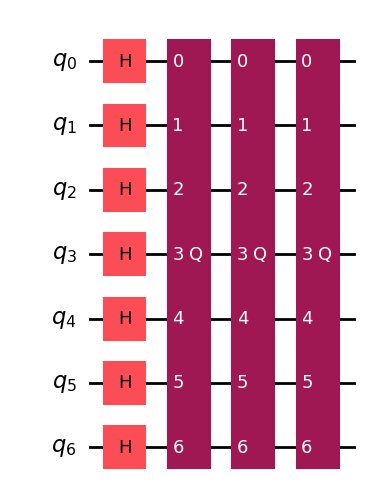

In [47]:
qc_2.compose(grover_op.power(1),inplace=True)#third iteration
qc_2.draw(output='mpl',style='iqp')

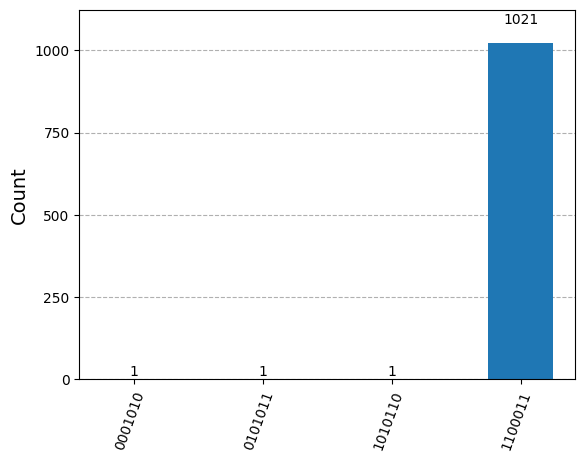

In [48]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

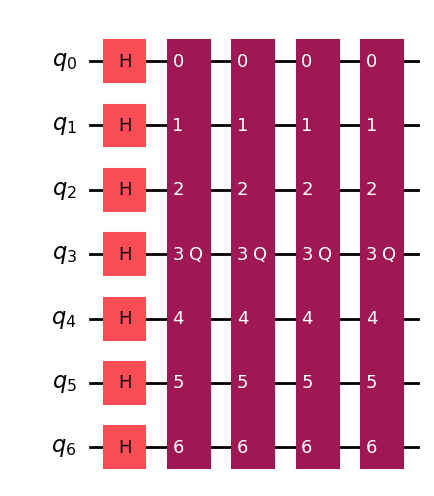

In [49]:
qc_2.compose(grover_op.power(1),inplace=True)#fourth iteration
qc_2.draw(output='mpl',style='iqp')

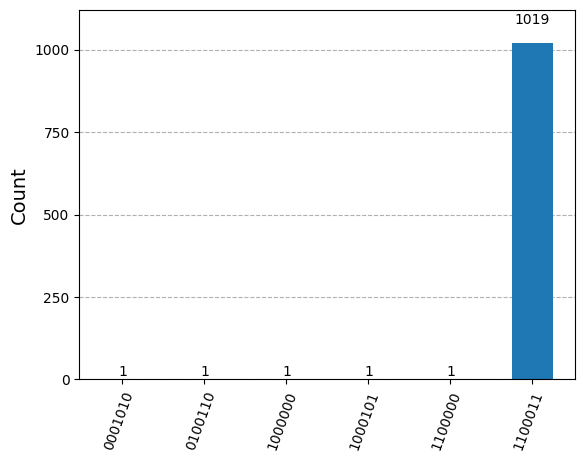

In [50]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

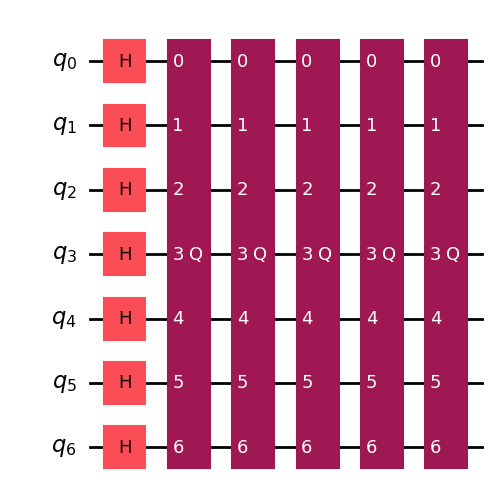

In [51]:
qc_2.compose(grover_op.power(1),inplace=True)#fifth iteration
qc_2.draw(output='mpl',style='iqp')

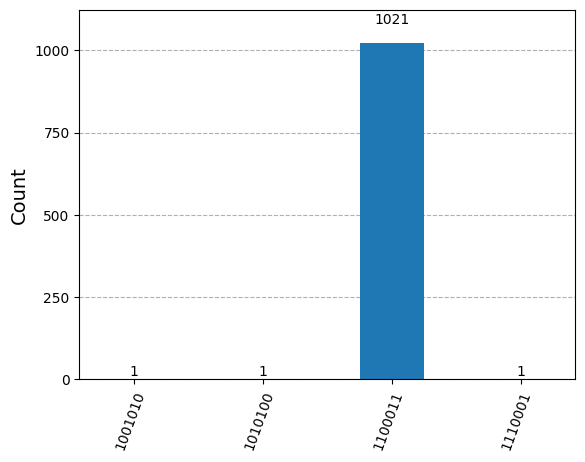

In [52]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

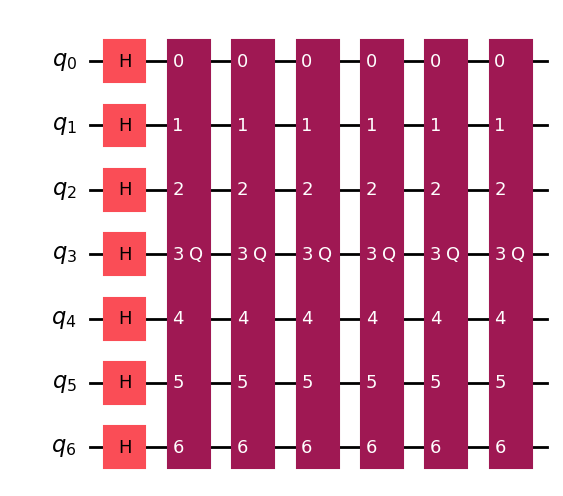

In [53]:
qc_2.compose(grover_op.power(1),inplace=True)#sixth iteration
qc_2.draw(output='mpl',style='iqp')

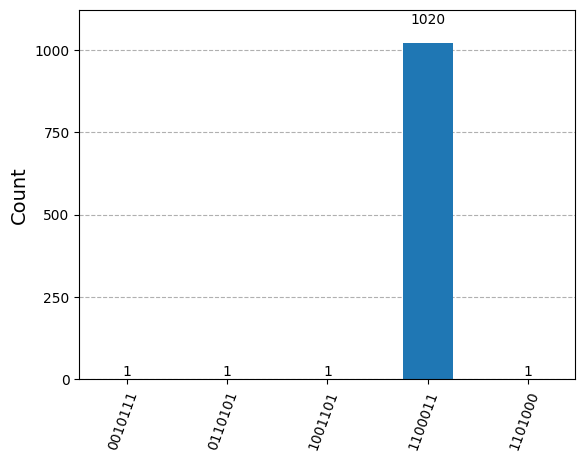

In [54]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

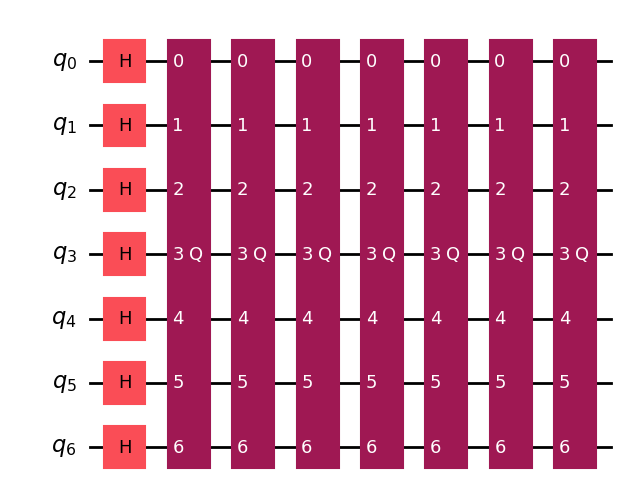

In [55]:
qc_2.compose(grover_op.power(1),inplace=True)#seventh iteration
qc_2.draw(output='mpl',style='iqp')

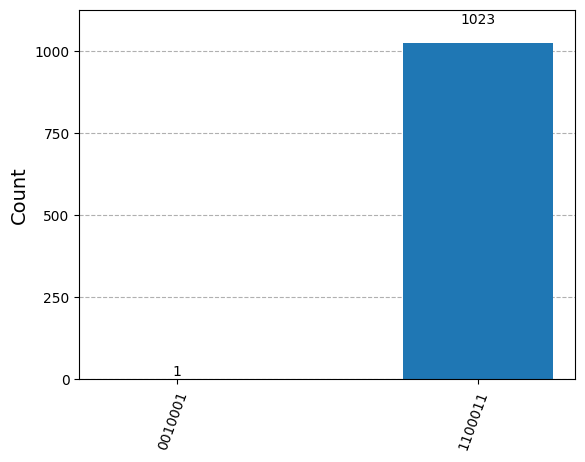

In [56]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

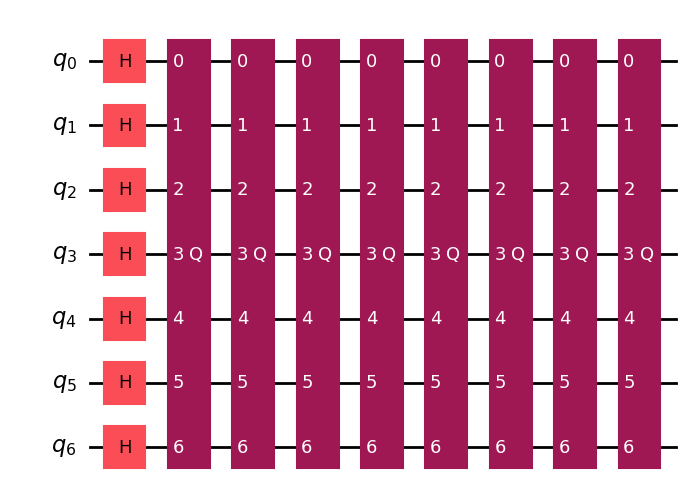

In [57]:
qc_2.compose(grover_op.power(1),inplace=True)#eight iteration
qc_2.draw(output='mpl',style='iqp')

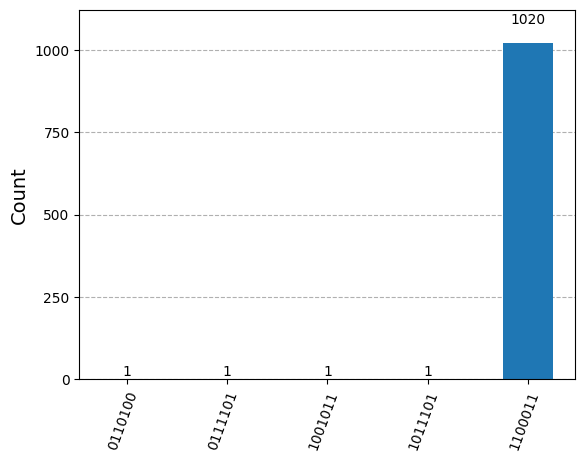

In [58]:
aer_sim = AerSimulator()
transpiled_grover_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)